In [128]:
"""
For this project the is data frame with 777 observations 
on the following 18 variables.

Private A factor with levels No and Yes indicating private or public university
Apps Number of applications received
Accept Number of applications accepted
Enroll Number of new students enrolled
Top10perc Pct. new students from top 10% of H.S. class
Top25perc Pct. new students from top 25% of H.S. class
F.Undergrad Number of fulltime undergraduates
P.Undergrad Number of parttime undergraduates
Outstate Out-of-state tuition
Room.Board Room and board costs
Books Estimated book costs
Personal Estimated personal spending
PhD Pct. of faculty with Ph.D.’s
Terminal Pct. of faculty with terminal degree
S.F.Ratio Student/faculty ratio
perc.alumni Pct. alumni who donate
Expend Instructional expenditure per student
Grad.Rate Graduation rate

there are labels for this data set, but 
we will NOT use them for the KMeans clustering algorithm, 
since that is an unsupervised learning algorithm.

In this case labesl will be used to try to get an idea of 
how well the algorithm performed, 
but it is not usual thing for Kmeans, 
so the classification report and confusion matrix at the end of this project, 
don't truly make sense in a real world setting!.

"""

"\nFor this project the is data frame with 777 observations \non the following 18 variables.\n\nPrivate A factor with levels No and Yes indicating private or public university\nApps Number of applications received\nAccept Number of applications accepted\nEnroll Number of new students enrolled\nTop10perc Pct. new students from top 10% of H.S. class\nTop25perc Pct. new students from top 25% of H.S. class\nF.Undergrad Number of fulltime undergraduates\nP.Undergrad Number of parttime undergraduates\nOutstate Out-of-state tuition\nRoom.Board Room and board costs\nBooks Estimated book costs\nPersonal Estimated personal spending\nPhD Pct. of faculty with Ph.D.’s\nTerminal Pct. of faculty with terminal degree\nS.F.Ratio Student/faculty ratio\nperc.alumni Pct. alumni who donate\nExpend Instructional expenditure per student\nGrad.Rate Graduation rate\n\nthere are labels for this data set, but \nwe will NOT use them for the KMeans clustering algorithm, \nsince that is an unsupervised learning alg

In [129]:
#1 getting the data

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [131]:
cf.go_offline()

In [132]:
col=pd.read_csv('College_Data')

In [133]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [134]:
col.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [135]:
col.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [136]:
col.rename(columns={'Unnamed: 0':''},inplace=True)
col.columns

Index(['', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [137]:
col.set_index('',inplace=True)

In [138]:
col.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [139]:
col.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [140]:
#3 exploratory data analysis

In [141]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

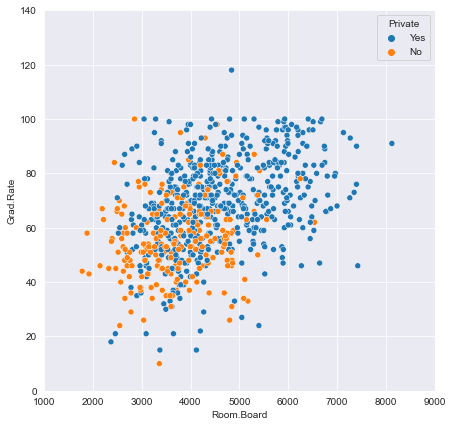

In [142]:
plt.figure(figsize=(7,7))
plt.ylim(0,140)
plt.xlim(1000,9000)
sns.scatterplot(x=col['Room.Board'],y=col['Grad.Rate'],hue=col['Private'])

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

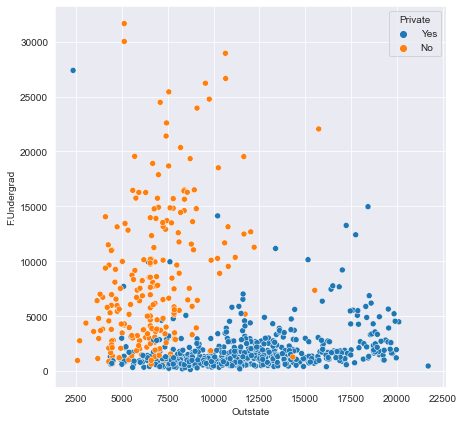

In [143]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=col['Outstate'],y=col['F.Undergrad'],hue=col['Private'])

Text(0.5, 6.799999999999994, '')

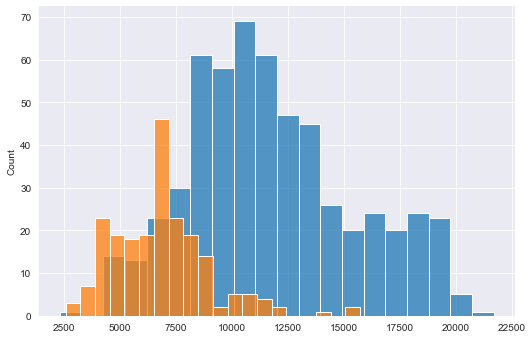

In [144]:
sns.FacetGrid(col,hue='Private',height=5,aspect=1.5).map(sns.histplot,'Outstate',bins=20)
plt.xlabel('')

Text(0.5, 6.799999999999994, '')

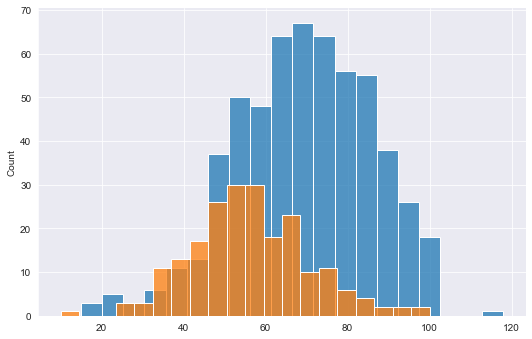

In [145]:
sns.FacetGrid(col,hue='Private',height=5,aspect=1.5).map(sns.histplot,'Grad.Rate',bins=20)
plt.xlabel('')

In [147]:
col[col['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,,,,,,,,,,,,,,,,,,
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [148]:
col[col['Grad.Rate']==118]=100

In [149]:
col[col['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,,,,,,,,,,,,,,,,,,


Text(0.5, 6.799999999999994, '')

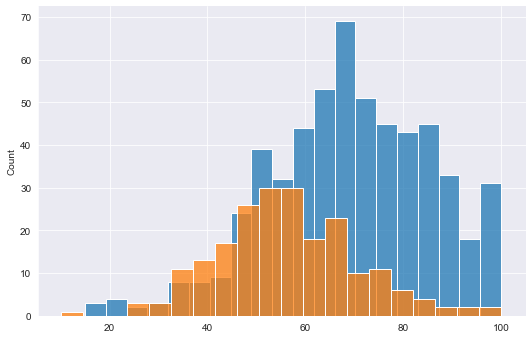

In [150]:
sns.FacetGrid(col,hue='Private',height=5,aspect=1.5).map(sns.histplot,'Grad.Rate',bins=20)
plt.xlabel('')

In [151]:
#4 K Means Cluster Creation

In [152]:
from sklearn.cluster import KMeans

In [153]:
kmeans = KMeans(n_clusters=2)

In [154]:
kmeans.fit(col.drop('Private',axis=1))

KMeans(n_clusters=2)

In [155]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.80763378e+03, 1.28218386e+03, 4.90406577e+02, 2.54454410e+01,
        5.35680120e+01, 2.18718834e+03, 5.95590433e+02, 1.03818311e+04,
        4.30427952e+03, 5.41234679e+02, 1.27973842e+03, 7.05590433e+01,
        7.79043348e+01, 1.42278027e+01, 2.32944694e+01, 8.92069058e+03,
        6.50926756e+01]])

In [156]:
#6 evaluation

In [157]:
private = pd.get_dummies(col['Private'])

In [158]:
private.rename(columns={'Yes':'Cluster'},inplace=True)
private.columns

Index([100, 'No', 'Cluster'], dtype='object')

In [159]:
col = pd.concat([col,private['Cluster']],axis=1)

In [160]:
col.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [161]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
print(classification_report(col['Cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.31      0.06      0.10       565
           1       0.21      0.65      0.31       212

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [162]:
#7 approximate comparison on graphs

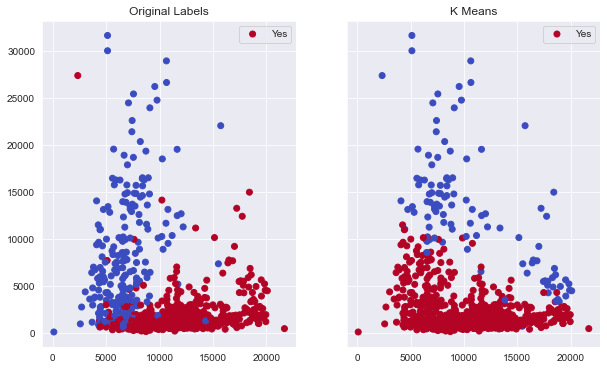

In [180]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(10,6))


ax1.set_title('Original Labels')
ax1.scatter(col['Outstate'],col['F.Undergrad'],c=col['Cluster'],cmap='coolwarm')
ax1.legend(col['Private'])

ax2.set_title('K Means')
ax2.scatter(col['Outstate'],col['F.Undergrad'],c=kmeans.labels_,cmap='coolwarm')
ax2.legend(col['Private'])
